## Librairies

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import chi2_contingency


## Import the data from url

In [2]:
url = 'https://raw.githubusercontent.com/remijul/dataset/master/Airline%20Passenger%20Satisfaction.csv'
df = pd.read_csv(url, sep=';')

df.head()

,id,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [3]:
df.shape

(129880, 24)

In [4]:
df.describe(include='all')
df.describe(exclude=[object]) 

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,37493.270818,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,1.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,97410.250000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Satisfaction                       129880 non-null  object 
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Seat comfort                       129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Gate location                      1298

In [6]:
df.isna().sum()

id                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

## Prepare/cleaning the dataset

In [7]:
df.dropna(inplace = True) 
df.shape

(129487, 24)

# Data analysis

#### Summary:
#### data shape : 129487, 24
#### types of variables: quantitative 5, qualitative: 19

In [8]:
df.columns

Index(['id', 'Satisfaction', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
df.groupby(by=["Satisfaction", "Gender", 'Customer Type', 'Class']).count()

id    Age  \
Satisfaction            Gender Customer Type     Class                    
neutral or dissatisfied Female Loyal Customer    Business   5827   5827   
                                                 Eco        5784   5784   
                                                 Eco Plus   1430   1430   
                               disloyal Customer Business   2885   2885   
                                                 Eco        6319   6319   
                                                 Eco Plus    659    659   
                        Male   Loyal Customer    Business   6631   6631   
                                                 Eco       17803  17803   
                                                 Eco Plus   3104   3104   
                               disloyal Customer Business   2670   2670   
                                                 Eco        5313   5313   
                                                 Eco Plus    180    180   
satisfied               Female Loyal Customer    Business  20594  20594   
                                                 Eco       16459  16459   
                                                 Eco Plus   2805   2805   
                               disloyal Customer Business   1873   1873   
                                                 Eco        1009   1009   
                                                 Eco Plus     59     59   
                        Male   Loyal Customer    Business  19728  19728   
                                                 Eco        4479   4479   
                                                 Eco Plus   1129   1129   
                               disloyal Customer Business   1782   1782   
                                                 Eco         951    951   
                                                 Eco Plus     14     14   

                                                           Type of Travel  \
Satisfaction            Gender Customer Type     Class                      
neutral or dissatisfied Female Loyal Customer    Business            5827   
                                                 Eco                 5784   
                                                 Eco Plus            1430   
                               disloyal Customer Business            2885   
                                                 Eco                 6319   
                                                 Eco Plus             659   
                        Male   Loyal Customer    Business            6631   
                                                 Eco                17803   
                                                 Eco Plus            3104   
                               disloyal Customer Business            2670   
                                                 Eco                 5313   
                                                 Eco Plus             180   
satisfied               Female Loyal Customer    Business           20594   
                                                 Eco                16459   
                                                 Eco Plus            2805   
                               disloyal Customer Business            1873   
                                                 Eco                 1009   
                                                 Eco Plus              59   
                        Male   Loyal Customer    Business           19728   
                                                 Eco                 4479   
                                                 Eco Plus            1129   
                               disloyal Customer Business            1782   
                                                 Eco                  951   
                                                 Eco Plus              14   

                                                           Flight Distance  \
Satisfaction            Gender

## Tocalculate P-value to understand the if the features are significant influence to 'Satisfaction'

In [20]:
features = ['Gender', 'Customer Type','Type of Travel','Class','Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                               'Food and drink','Gate location', 'Inflight wifi service', 'Inflight entertainment', 
                               'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 
                               'Baggage handling', 'Checkin service']

p_values = {}

# Iterate over each feature and perform a chi-squared test of independence
for feature in features:
    df_pivot = df[['Satisfaction', feature]].pivot_table(index='Satisfaction', columns=feature, aggfunc=len)
    st_chi2, st_p, st_dof, st_exp = chi2_contingency(df_pivot)
    p_values[feature] = st_p

p_values_df = pd.DataFrame({'p-value': p_values})
p_values_df.index.name = 'Feature'
p_values_df

,p-value
Feature,
Age,0.000000e+00
Baggage handling,0.000000e+00
Checkin service,NaN
Class,0.000000e+00
Customer Type,0.000000e+00
Departure/Arrival time convenient,7.058184e-43
Ease of Online booking,NaN
Flight Distance,NaN
Food and drink,0.000000e+00


In [23]:
fig = px.bar(p_values_df.reset_index(), x='Feature', y='p-value', title='P-values for Satisfaction by Feature')

fig.update_layout(xaxis_title='Feature', yaxis_title='P-value', yaxis_tickformat='.3f')

fig.show()


#### This result is a bit weird, which means all the features are significantly influence the "Satisfaction"

In [13]:
df.groupby('Class').groups.keys()
df.groupby('Customer Type').groups.keys()

dict_keys(['Loyal Customer', 'disloyal Customer'])

## The proportion of different types for "Gender, Customer Type, Type of Travel, Class, Satisfaction"

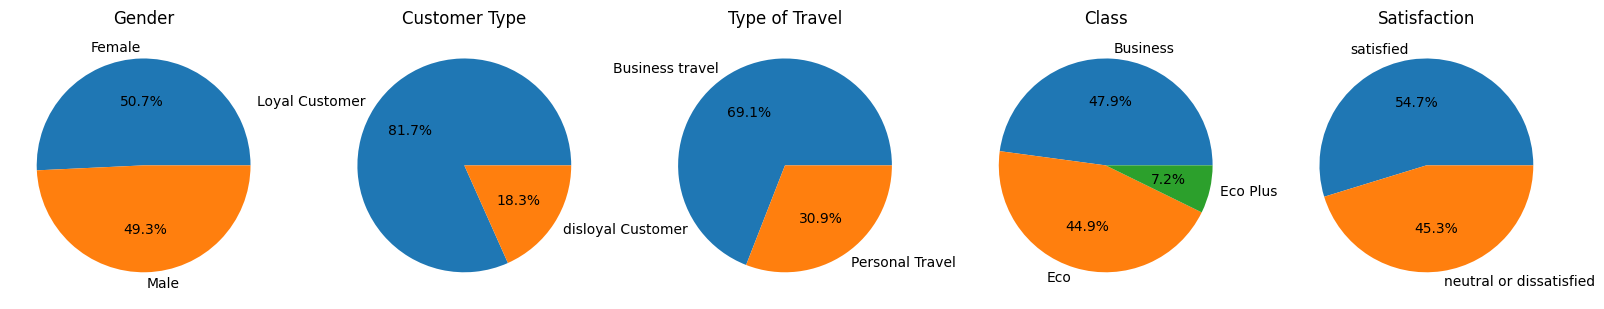

In [14]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

# Create subplots for each column
fig, axs = plt.subplots(1, len(cols), figsize=(20, 8))

for i, col in enumerate(cols):
    
    # Get value counts for column
    df_counts = df[col].value_counts()

    axs[i].pie(df_counts, labels=df_counts.index, autopct='%1.1f%%')
    axs[i].set_title(col)

plt.show()


Text(0, 0.5, 'Arrival Delay in Minutes')

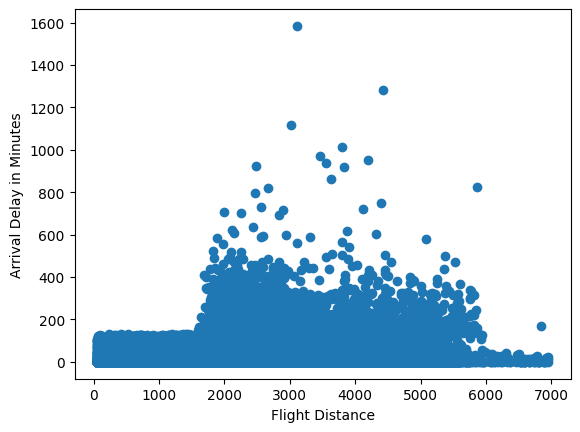

In [29]:
plt.scatter(df['Flight Distance'], df['Arrival Delay in Minutes'])
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay in Minutes')

### More quantitative data analysis are put into the Webapp ( Streamlit): https://fengfengz93-app-airline-index-emd4ck.streamlit.app/analysis_descriptive

## Correlation analysis to understand the relations between all the features

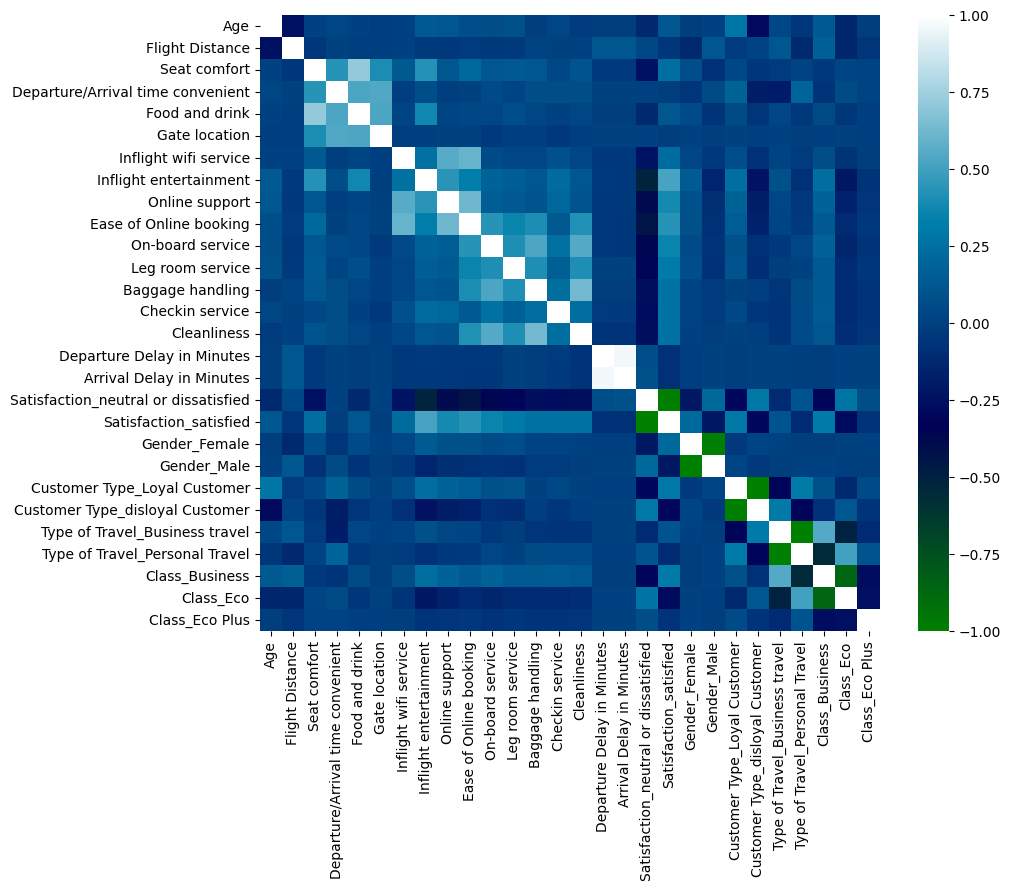

In [26]:
# Correlation between all the features

# Encode the qualitative variables into numerical values using one-hot encoding
df_encoded = pd.get_dummies(df, columns=["Satisfaction", 'Gender', 'Customer Type', 'Type of Travel', 'Class'])

quant_vars = ['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Departure Delay in Minutes', 
       'Arrival Delay in Minutes']

# Calculate the correlation matrix using Pearson correlation
corr_matrix = df_encoded[quant_vars + list(df_encoded.filter(regex='Satisfaction_|Gender_|Customer Type_|Type of Travel_|Class_'))].corr(method='pearson')


plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, cmap='ocean')

plt.show()

### Pre_Conclusions
#### P-value calculation shows all the features have significant influence on "Satisfaction"
#### Feature correlation result doesn't show certain ones have strong relation with "Satisfaction"